### LIBRARIES

In [2]:
import os
import glob
import time
import swifter
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import multiprocessing as mp
import ipywidgets as widgets
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
from toggle_cell import toggle_code as hide
init_notebook_mode(connected=True)


### LOAD DATA

In [3]:
combined_csv = r"C:\Users\LOCALGHOST\Desktop\DATASETS\AIR_QUALITY\WAQI\Processed\combined_csv.csv" #add your path here
combined_df = pd.read_csv(combined_csv, parse_dates = True,index_col = 'date')

hide()

In [17]:
hide()
country_list = sorted(combined_df.country.unique())
country_li = widgets.Dropdown(options = country_list)
gauge_list = sorted(combined_df['gauge'].unique())
gauge_li = widgets.Dropdown(options = gauge_list)
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Click here</a> Select Options and run the code below''')
display(tag)

############### Write code below ##################
display(country_li,gauge_li)


Dropdown(options=('Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Bel…

Dropdown(options=('aqi', 'co', 'd', 'dew', 'humidity', 'mepaqi', 'neph', 'no2', 'o3', 'pm1', 'pm10', 'pm25', '…

In [19]:
country = country_li.value
gauge = gauge_li.value
country_df = combined_df[(combined_df.country == country_li.value) & (combined_df.gauge == gauge_li.value)][['min','max','median']]
hide()
country_df[0:5]

,min,max,median
date,,,
2015-01-01,189.0,329.0,300.0
2015-01-01,151.0,155.0,153.0
2015-01-01,189.0,657.0,382.0
2015-01-01,158.0,166.0,164.0
2015-01-01,189.0,253.0,239.0


*** 


#### DUPLICATES 

*** 


In [20]:
country_df = country_df.resample('D').mean()

In [21]:
end_date = country_df.index.max()
start_date = country_df.index.min()
display("Start date : {}".format(start_date),"End date : {}".format(end_date))

'Start date : 2015-01-01 00:00:00'

'End date : 2020-05-06 00:00:00'

*** 

#### OUTLIERS

*** 


In [22]:
col = 'max'

All changes are made in a duplicate df

In [23]:
country_df_out = country_df
shape1 = country_df_out.shape
print("Total rows : "+str(shape1[0]))

Total rows : 1953


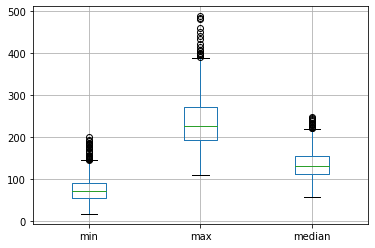

In [24]:
country_df_out.boxplot()
plt.show()

To remove any outliers :    
    - use the slider to select max_value
    - uncomment the following cell and run remaining cells

In [25]:
widgets.IntSlider(
    min=10,
    max=1000,
    step=10,
    description='Slider:',
    value=50
)
slider = widgets.IntSlider()
display(slider)
hide()

IntSlider(value=0)

'Total rows = 0'

'1953 rows removed'

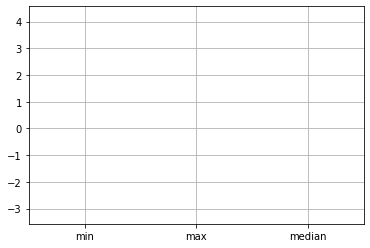

In [26]:
country_df_out = country_df_out[country_df_out[col]<slider.value] # filtered out outliers
shape2 = country_df_out.shape
display('Total rows = {}'.format(shape2[0]))
display("{} rows removed".format(shape1[0]-shape2[0]))
country_df_out.boxplot()
plt.show()

In [27]:
# country_df = country_df_out

*** 

### COUNTRY - DAILY

*** 

*** 
MISSING VALUES

*** 

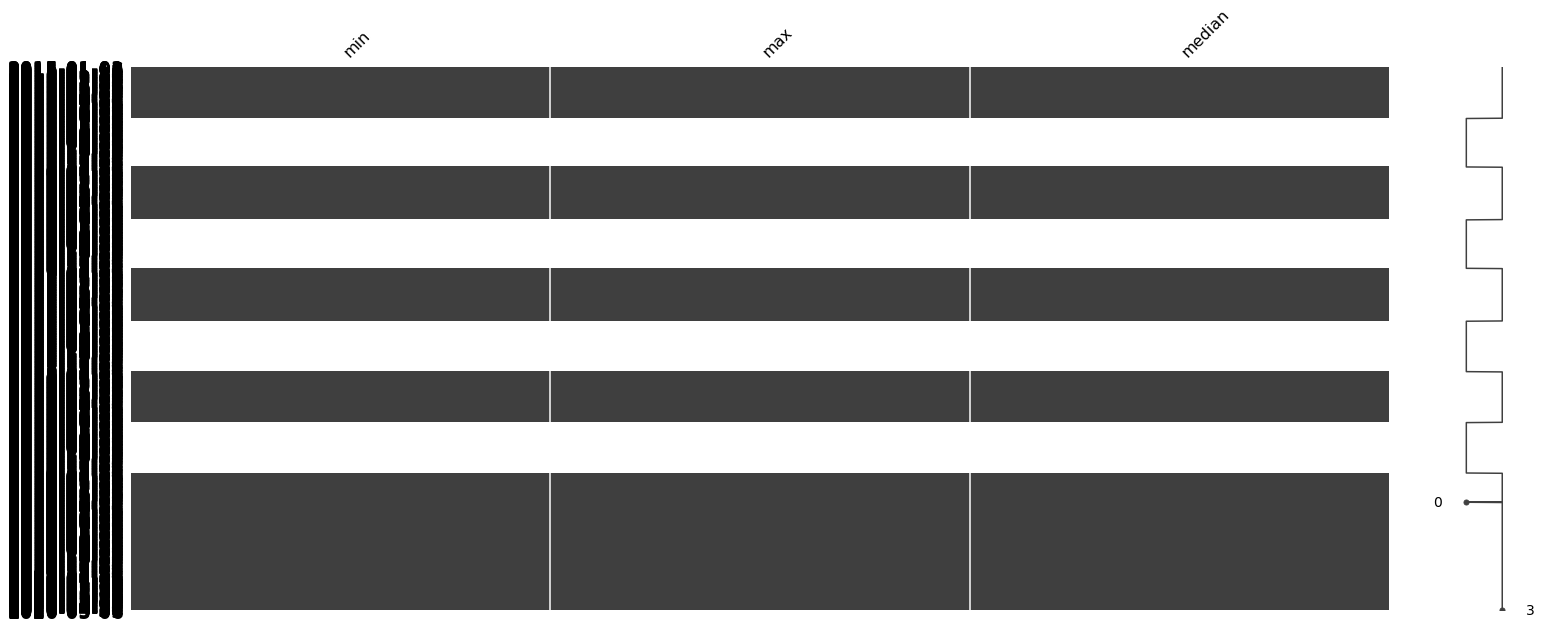

In [28]:
msno.matrix(country_df, freq = 'D')

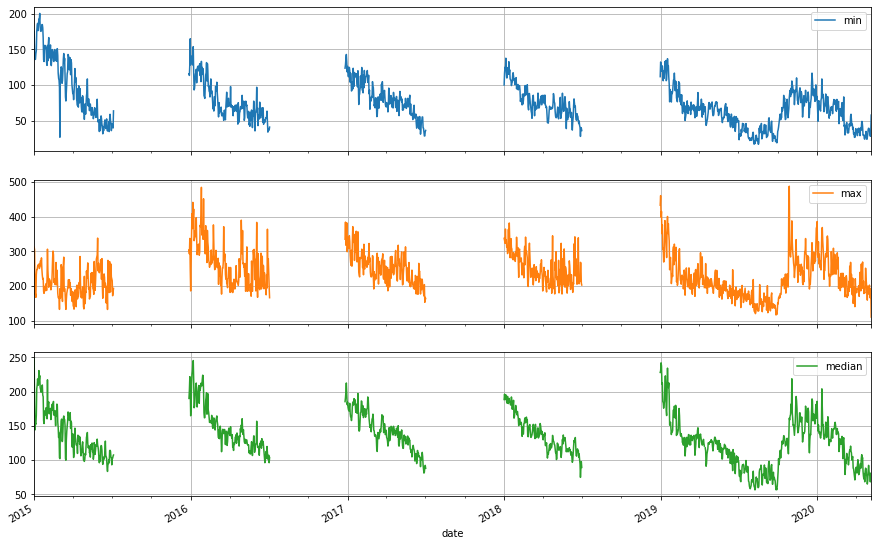

In [29]:
plt.rcParams['figure.figsize'] = (15,10)
country_df.plot(subplots = True,grid = True)
plt.show()

In [30]:
mval = country_df.isna().sum()
print( 'Missing Values ::' ,mval)

Missing Values :: min       715
max       715
median    715
dtype: int64


*** 


## country - WEEKLY

*** 


MISSING VALUES

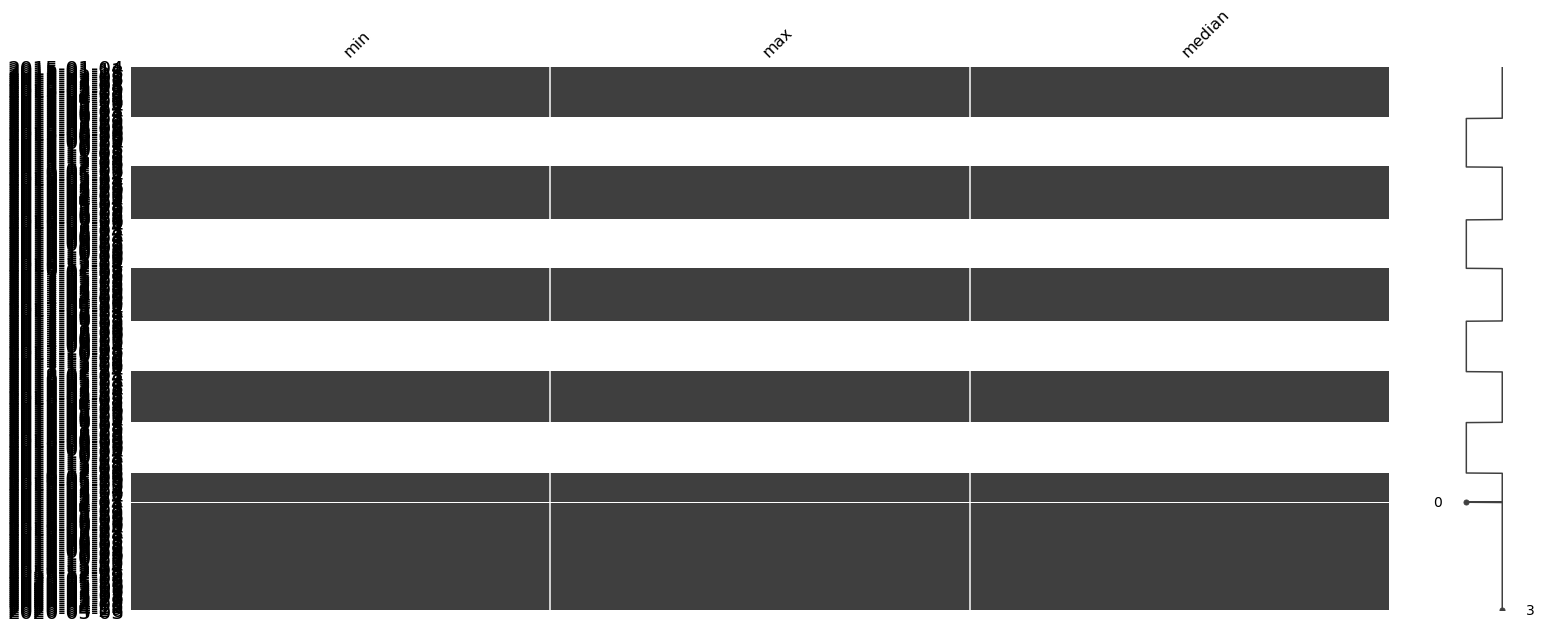

In [31]:
msno.matrix(country_df , freq = 'W')

In [32]:
country_df_w = country_df.resample('W').mean()

'PM25-weekly-India'

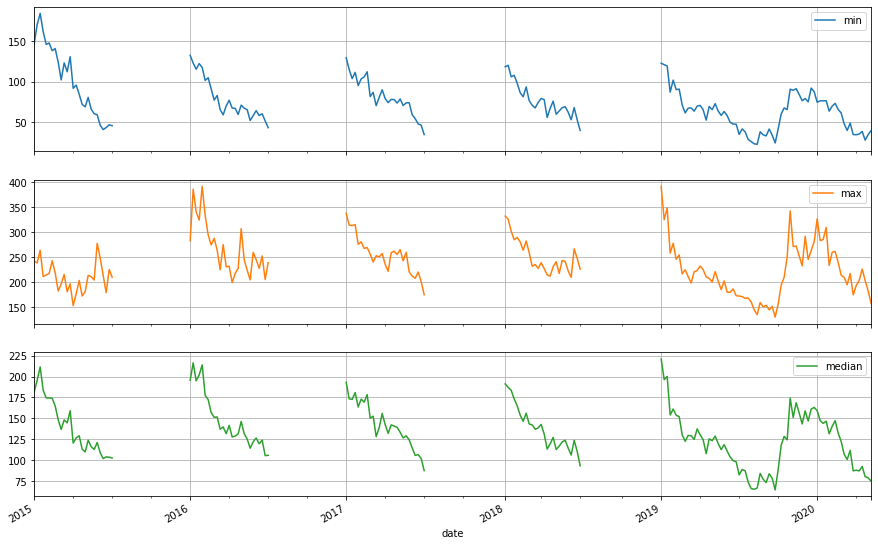

In [33]:
country_df_w.plot(subplots=True,grid = True)
display(str.upper(gauge)+"-weekly-"+country)
plt.show()

*** 

*** 


## country - MONTHLY

*** 


In [34]:
country_df_m = country_df.resample('M').mean()

MISSING VALUES

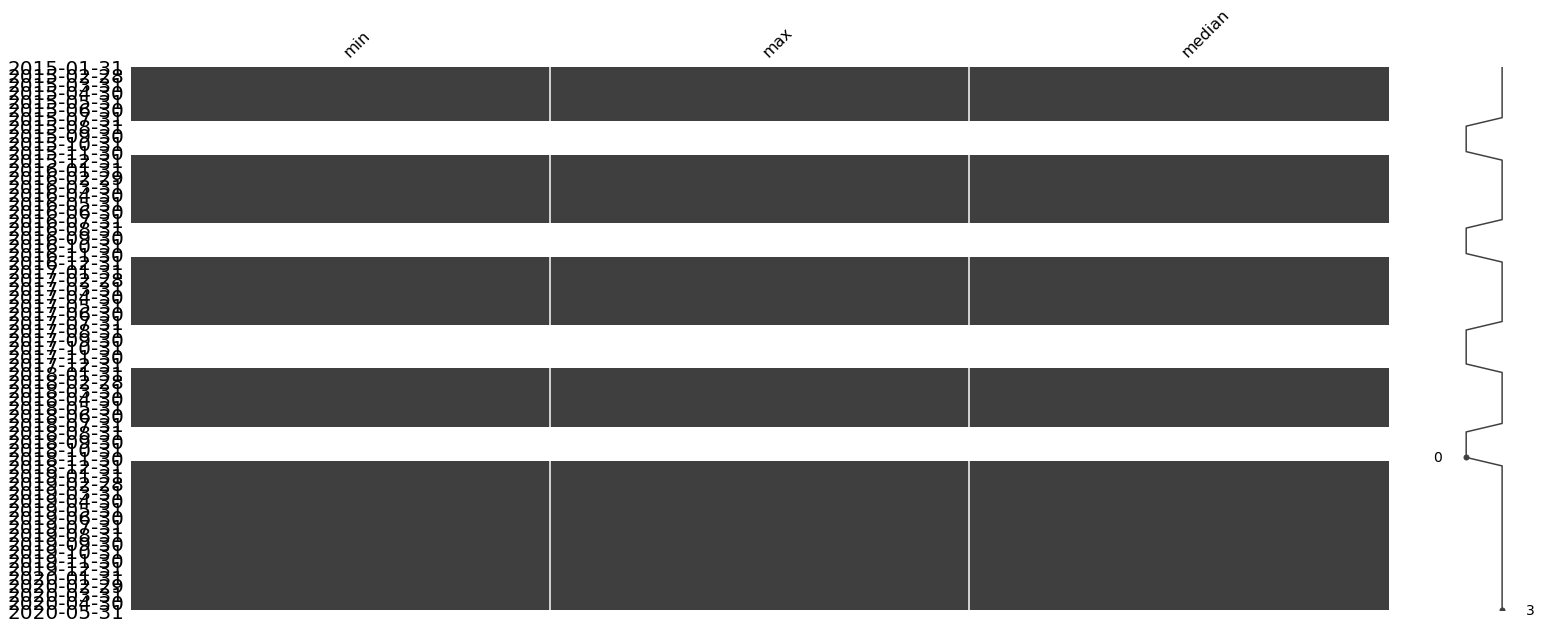

In [35]:
msno.matrix(country_df_m , freq = 'M')

'PM25-monthly-India'

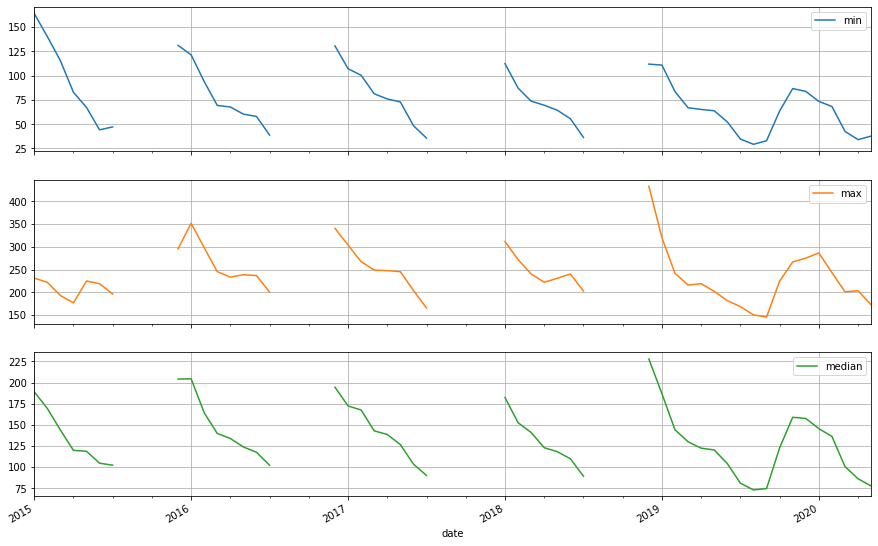

In [36]:
country_df_m.plot(subplots=True,grid = True)
display(str.upper(gauge)+"-monthly-"+country)
plt.show()

*** 

## country - QUATERLY

*** 


MISSING VALUES

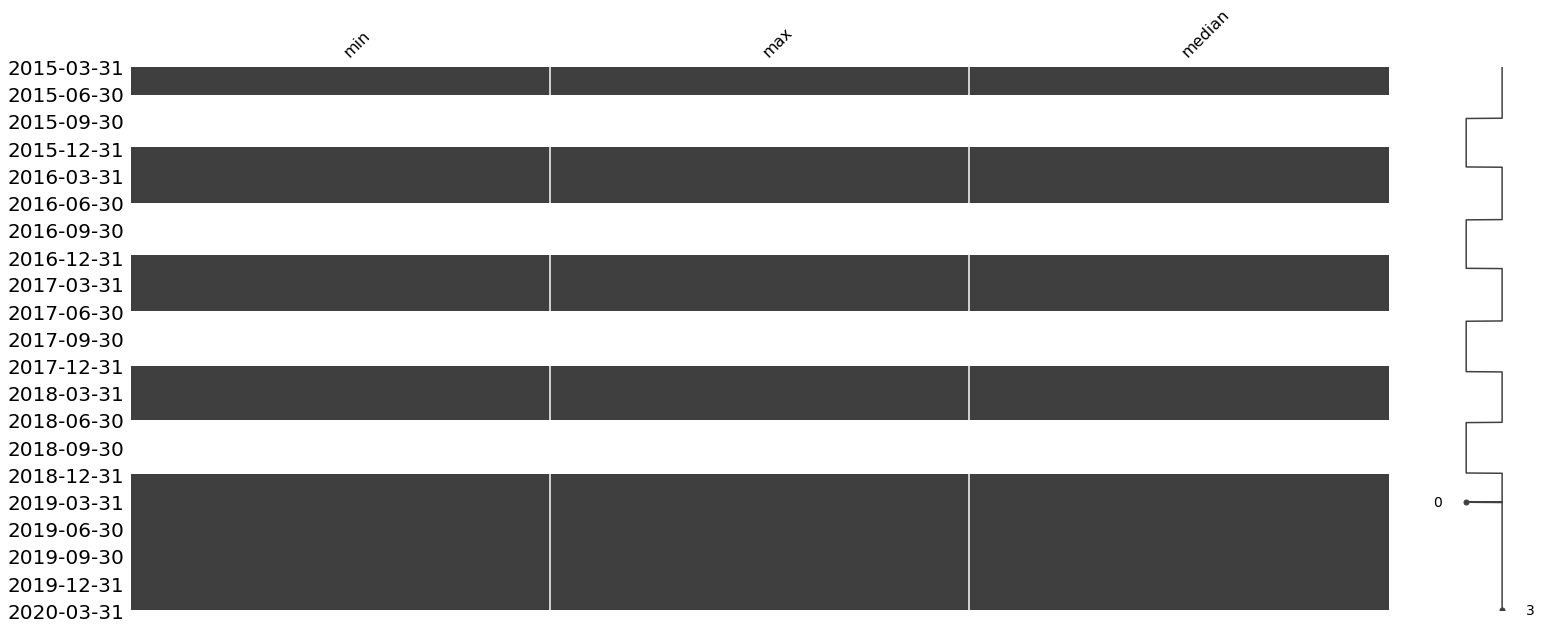

In [37]:
msno.matrix(country_df, freq = 'Q')

In [38]:
country_df_q = country_df.asfreq('QS')

'PM25-quarterly-India'

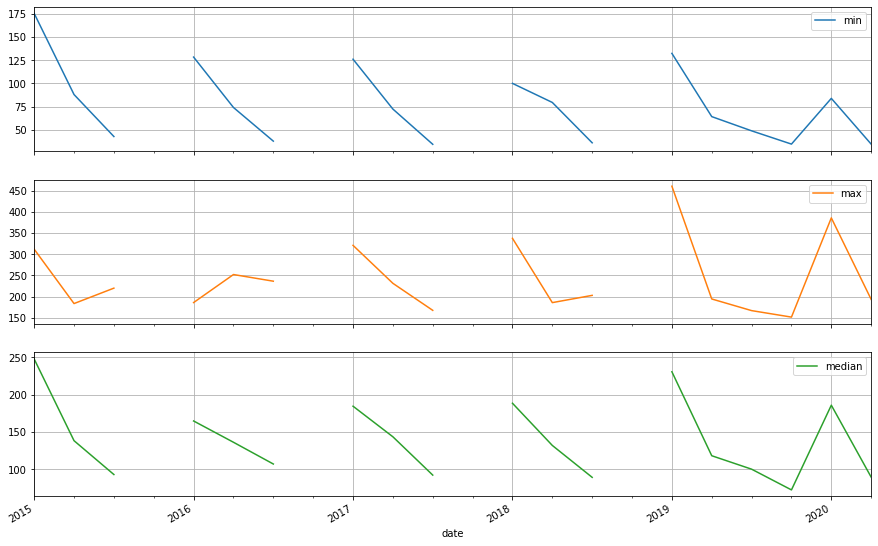

In [39]:
country_df_q.plot(subplots=True , grid = True)
display(str.upper(gauge)+"-quarterly-"+country)
plt.show()

## country - YEARLY

*** 


MISSING VALUES

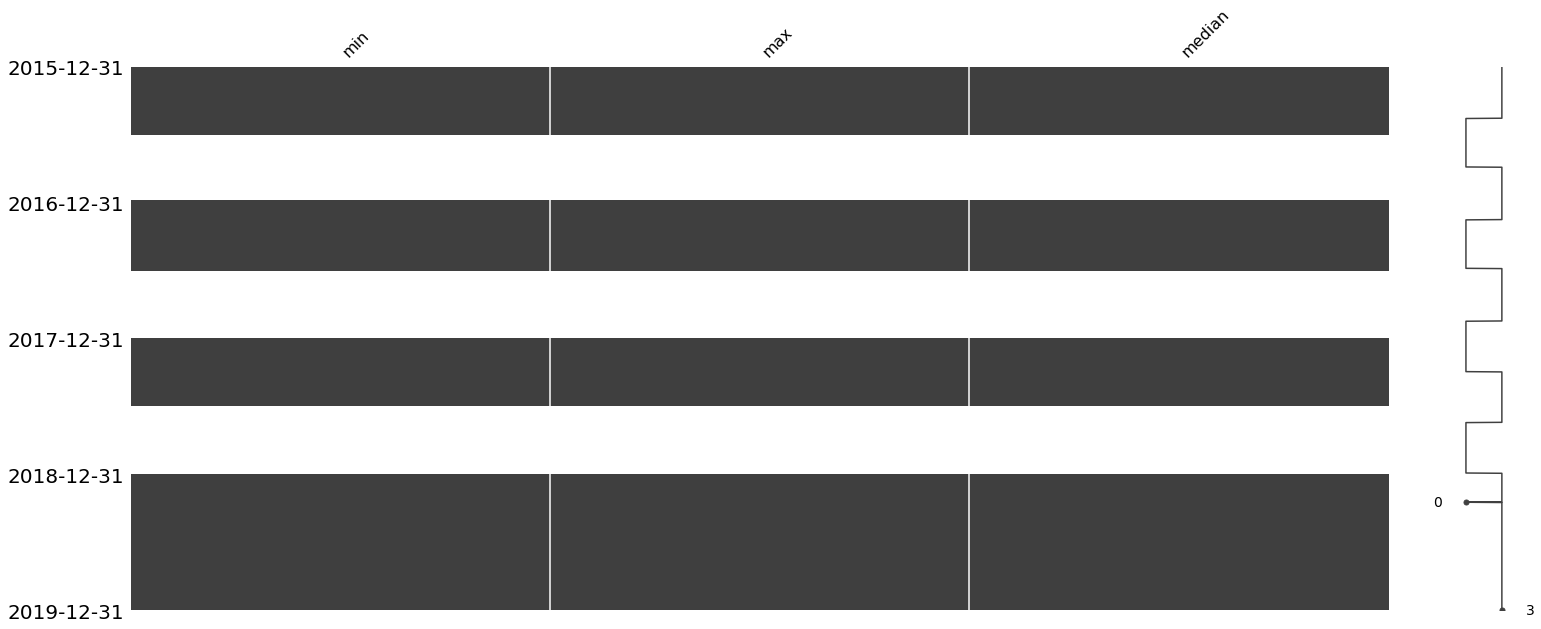

In [40]:
msno.matrix(country_df , freq = 'Y')

In [41]:
country_df_y = country_df.asfreq('Y' , how = 'start')

'PM25-yearly-India'

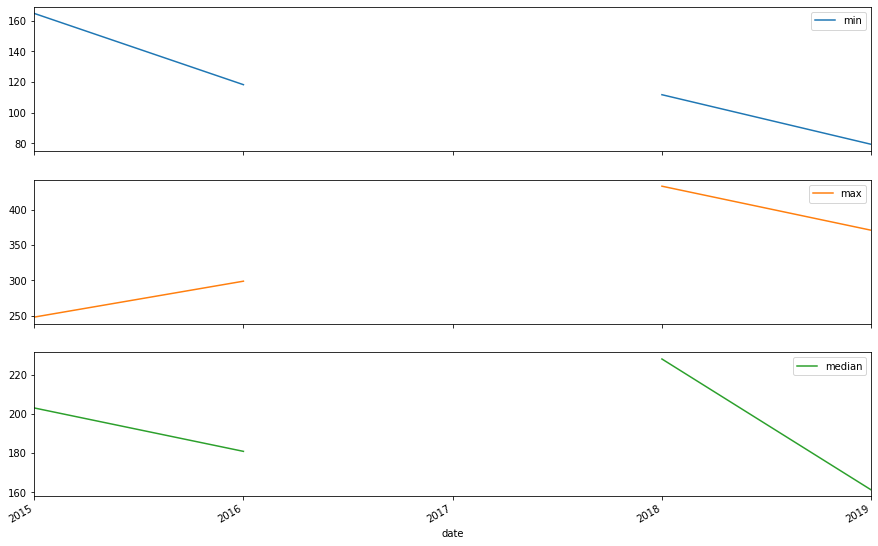

In [42]:
country_df_y.plot(subplots=True)
display(str.upper(gauge)+"-yearly-"+country)
plt.show()

*** 
#### TO GENERATE DATA WITHOUT FILLING MISSING VALUES - RUN CELL BELOW
*** 

In [43]:
# csv = '.\\data\\processed\\'+country+'_'+gauge+'_'+'_mly.csv'
# country_df_m.to_csv(csv)